# Heap Sort Algorithm
***

### Introduction
Heap Sort is a very *efficient* and widely used **sorting algorithm** that uses a **heap** *data structure*. However, it might be *unstable* as actions in the heap might modify the relative order of equivalent keys. 

Reference: __[Heap Sort](http://syllabus.cs.manchester.ac.uk/ugt/2019/COMP26120/SortingTool/heap_sort_info.html)__

Heap sort can also be thought of as a ***more advanced version*** of **binary trees**. Instead of *building nodes*, it *generates a heap* by *altering the position of elements* in the array itself.

Reference: __[Heap Sort Algorithm](https://www.interviewbit.com/tutorial/heap-sort-algorithm/)__

## Binary Tree
***
Before moving more into heap and heap sort, it is important to understand binary tree as it is the fundamental of heap.

<img src="https://miro.medium.com/max/1056/1*8_QJ6hYqWdLomvwNt6ydBg.png" width=400 height=400 />

A Binary Tree is a non-linear data strcture which consists of ***nodes*** that *linked by edges*. Each node can ***only have at most two children***.

Reference: __[Data Structures: Binary Search Trees Explained](https://medium.com/@mbetances1002/data-structures-binary-search-trees-explained-5a2eeb1a9e8b)__

#### Type of nodes
- **Root**: The one and only, located at the top of the tree.
- **Parent Node**: Any nodes (excluding the root) that has at least one child node (sub-node).
- **Child Node**: A sub-node that is connected by an edge from a parent node
- **Leaf Node**: Nodes that have no sub-nodes.
- **Subtree**: Descendants  of a parent node

Reference: __[Trees, Binary Trees, and Binary Search](https://jamalrahman.co.uk/trees-binarytrees-binarysearch/)__

### Complete Binary Tree
Although there are many types of binary trees, only **complete binary tree** will be discussed in this context as it is related to heap sort.

<img src="https://www.techiedelight.com/wp-content/uploads/Complete-Binary-Tree.png" width=600 height=600 />

Reference: __[Check if a binary tree is a complete binary tree or not](https://www.techiedelight.com/check-given-binary-tree-complete-binary-tree-not/)__

In a *complete binary tree*, every level **has to be filled with nodes**, except the *lowest level* of the tree. However, it is vital to note that **any nodes at the lowest level of the tree must lean to the** ***left*** in order to be a *complete binary tree* as shown in the diagram above. Without any gaps between nodes, the tree will be **balanced** and therefore, allow heap to be represented efficiently in an array.

Reference: __[Heap vs Binary Search Tree](https://www.baeldung.com/cs/heap-vs-binary-search-tree)__

## Heap
***
<img src="https://miro.medium.com/max/1400/1*piq5Ggxwz2Ldi26uQz_d5g.png" width=600 height=600 />

The tree needs to be a heap to be sorted and a heap has to meet two requirements:
1. It must be a **complete binary tree**.
2. In this complete binary tree, the *root* or *parent* node must be ***less or equal*** to the value of its *child nodes* while ***the root has the smallest number***, this heap is known as **Min-Heap**; or the *root* or *parent node* must be ***greater or equal*** to the value of its *child nodes* while ***the root has the largest number***, this heap is known as **Max-Heap**. 

Reference: __[What is Binary Heap?](https://medium.com/@mopurisreenath/what-is-binary-heap-25cd0f8bed24)__


### Characteristics of Heap
As stated above, heap is a complete binary tree, hence, finding the location of a parent node and children nodes of a heap is feasible and straightforward.

- The left child of a node $(i)$ will be at position $(2 \times i) + 1$ while the right child of a node $(i)$ will be at position $(2 \times i) + 2$
- The parent of a node will be position at $floor((i - 1) \div 2)$

#### Example Calculation

<img src="https://www.geeksforgeeks.org/wp-content/uploads/binaryheap.png" width=300 height=300 />

According to the tree above, **node 3** has the *index of 1* where $i = 1$.
<br>
>*Left child index of 3:*
$(2 \times i) + 1 = (2 \times 1) + 1 = 3$
<br>
*Right child index of 3:*
$(2 \times i) + 2 = (2 \times 1) + 2 = 4$
<br>

From calculations above, ***left child*** of **node 3** is positioned at *index 3* which is **node 5** and its ***right child*** is positioned at *index 4* which is **node 9**. Conversely, both *parents* of **node 5 and node 9** is **node 3** which can be shown with calculations below:
<br>
> *Parent index of 5:*
$floor((i - 1) \div 2) = floor((3 - 1) \div 2) = floor(1) = 1$
<br>
*Parent index of 9:*
$floor((i - 1) \div 2) = floor((4 - 1) \div 2) = floor(1.5) = 1$

Reference: __[Binary Heap](https://www.geeksforgeeks.org/binary-heap/)__

## Heap Sort
***
To sort a heap, there are **two essential steps** need to be ***repeated*** until the dataset is sorted:
1. Convert the current complete binary tree into a *max-heap*.
2. *Switch the root node* of the Max-Heap with the *last node* and *remove* it.

The illustration below clearly shows how heap sort works:

<img src="http://www.btechsmartclass.com/data_structures/ds_images/Heap_Sort_Algorithm.png" width=500 height=300 />

Reference: __[Heap Sort Algorithm](http://www.btechsmartclass.com/data_structures/heap-sort.html)__

## Heap Sort with Python
***
In this context, **Python** will be used as the *main programming language* to demonstrate heap sort by code.

### Binary Tree
Before diving into codes for heap sort algorithm. Here is how to construct a binary tree using Python:

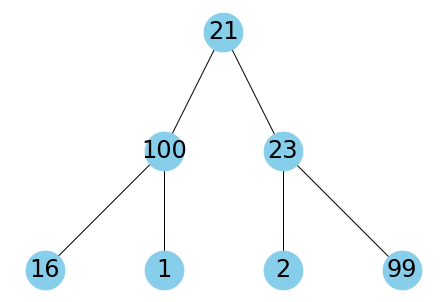

In [1]:
# imports
import networkx as nx # for graphs
import matplotlib as plt # for plotting
import math # for math functions

def draw_bTree(L):
    # Generate a balanced binary tree
    bTree = nx.balanced_tree(2, math.floor(math.log(len(L), 2)))
    # Remove nodes beyond the length of L.
    bTree.remove_nodes_from(list(bTree.nodes)[len(L):])
    # Relabel the nodes with elements of L.
    bTree = nx.relabel_nodes(bTree, dict(zip(bTree.nodes, L)), copy=True)
    # Get nice positions for the nodes in the picture.
    pos = nx.drawing.nx_pydot.graphviz_layout(bTree, prog="dot")
    # Draw the graph.
    nx.draw(bTree, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=24)

# Sample List
L = [21, 100, 23, 16, 1, 2, 99]
# Draw Binary Tree
draw_bTree(L)

### Heapify Function

As illustrated above, the complete binary tree needs to be *modified into a Max-Heap* to implement heap sort. This modification process can be known as **heapify** or **heapification**. The heapify function will alter the root node to its position to ensure Max-Heap.

To achieve Max-Heap, there are two approaches:
1. **Sift up**: A child node swaps with its parent if the parent is smaller than it, therefore moving/sifting up the tree
2. **Sift down**: A parent node (including the root node) swaps with its smaller child while moving/sifting down the tree.

It is interestingly to note that heapify **only** ***uses sift down approach***. In the scenario where *all nodes have to be swapped*, **sift up** approach will start checking and swapping from the *leaf nodes* while **sift down** approach will start from the *root node*. As a result, sift down approach will be ***more effective*** as it will not need to check the leaf nodes at the lowest level. 

Reference: __[How can building a heap be O(n) time complexity?](https://stackoverflow.com/questions/9755721/how-can-building-a-heap-be-on-time-complexity)__

Code demonstration for heapify using sift down approach in python is as follows:

In [2]:
def heapify(array, n, i):
    # n is the size/length of the array
    # i is the current node index (root of current subtree/parent node)
    
    # Initialise parent and its children nodes
    parent = i
    left_child = 2 * i + 1
    right_child = 2 * i + 2
    
    # If left_child index exists (not bigger than size/length of array)
    # and if current node is smaller than its left child
    if left_child < n and array[parent] < array[left_child]:
        # Change parent index to left_child
        parent = left_child
        
    # If right_child index exists (not bigger than size/length of array)
    # and if current node is smaller than its left child
    if right_child < n and array[parent] < array[right_child]:
        # Change parent index to right_child
        parent = right_child
        
    # If initial root/parent node changed
    if parent != i:
        # Swap and repeat heapify to ensure root/parent node is the largest
        array[i], array[parent] = array[parent], array[i]
        heapify(array, n, parent)

### Heap Sort Function

**Heapify function** will be implemented ***repetitively*** from the last parent to ensure that the tree ***satisfies Max-Heap property***. 

To find the last parent, the equation below is used:
> **last_parent** = $floor(((n-1)-1) \div 2)$ 
<br>*n is the size of the binary tree dataset while $(n-1)$ is the last node in the tree*

The root from the Max-Heap will then be ***removed*** and heapify function will be reimplemented **iteratively** to establish a Max-Heap. The array dataset will be *sorted* after all iterations are completed.

Reference: __[HeapSort](https://www.geeksforgeeks.org/heap-sort/#:~:text=Heap%20sort%20is%20a%20comparison,process%20for%20the%20remaining%20elements)__

The following is a python code example for heap sort:

In [3]:
def heap_sort(array):
    
    # Get the size/length of the array
    n = len(array)
    
    # Get the last node
    last_node = n - 1
    
    # Get the last parent using the equation shown above
    # Note: "//" is floor division in python
    last_parent = (last_node - 1) // 2
    
    # Modify tree to Max-Heap by looping backwards from the last parent
    for i in range(last_parent, -1, -1):
        heapify(array, n, i)
        
    # Swap root node with last node, extract it and "re-heapify" the tree
    for i in range(last_node, 0, -1):
        array[i], array[0] = array[0], array[i]
        heapify(array, i, 0)

Binary Tree before heap sort:


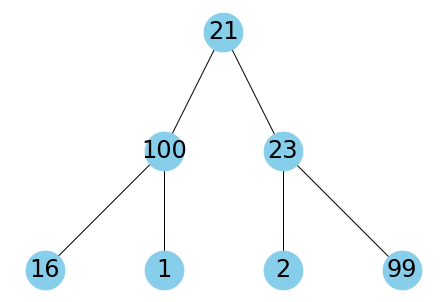

In [4]:
# Sample list
print("Binary Tree before heap sort:")
draw_bTree(L)

Binary Tree after heap sort:


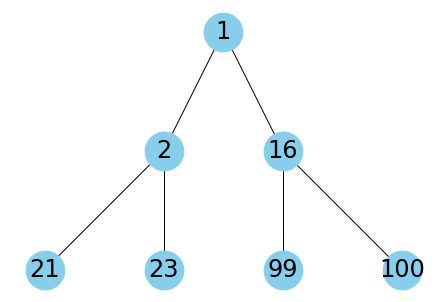

In [5]:
# Sort the list using heap sort algorithm
heap_sort(L)
print("Binary Tree after heap sort:")
L
draw_bTree(L)

## Heap Sort Complexity
***
Time Complexity and Space Complexity of heap sort will be discussed in this section. In lay man's terms, **time complexity** measures the ***CPU usage*** used while **space complexity** computes the amount of ***RAM usage***. 

### Time Complexity

Same as previous, heap will be analysed beforehand. Heapify process has a time complexity of `O(log n)` as nodes ***will be swapped to satisfy Max-Heap property***. As a complete binary tree has a height of $log(n)$, swaps could be done till $log(n)$ moves.

As **heap sort implements heapify** ***repeatedly or n<sup>th</sup> times***, the time complexity of heap sort algorithm is `O(nlog n)`

However, one may argue that heap sort algorithm might have `O(n)` time complexity ***if the data in the array or tree is all identical***. During heapify process, the last node replacing the root node **will not need to swap down the heap** as *all elements are identical*. Hence, the time complexity for heapify process in this scenario will be `O(1)`. As a result, heap sort algorithm will take `O(n)` time by repeating heapify process n<sup>th</sup> times **if and only if** ***elements in the array or tree are all the same***.

### Space Complexity

As numbers in the array remain **unchanged** throughout the execution of heap sort, the space complexity of heap sort is `O(1)`. The reason behind this is because all swapping process happens ***within the heap structure*** and all root nodes that are removed during heap sort are *placed at the end of the array*. Therefore, **no extra space is needed** for heap sort algorithm.
	
References: __[Time & Space Complexity of Heap Sort](https://iq.opengenus.org/time-complexity-of-heap-sort/), [Heapsort Algorithm](https://www.interviewcake.com/concept/java/heapsort)__

## Heap Sort with Graph Theory
***
<img src="https://miro.medium.com/max/1400/1*sdUlnmnwMcPQljH52HiYBQ.jpeg" width=400 height=400 />

A network, or a collection of related items, is represented using graphs. **Graph theory** is about connections between ***nodes/vertices*** connected by ***edges/links*** which can be *directed (one-way)* or *undirected (bi-directional)*.

Reference: __[A Gentle Introduction To Graph Theory](https://medium.com/basecs/a-gentle-introduction-to-graph-theory-77969829ead8)__

The implementation of graphs could be seen almost anywhere around us. From mapping distance or getting directions on a map to social media connections or friendships, all of these are associated with graphs. 

<img src="https://www.educative.io/api/edpresso/shot/6304047290646528/image/6393961088811008" width=400 height=400 />

In this context, heap sort is correlated to graph theory as trees are used. Trees are a ***subset*** of graphs which have certain rules to follow:
1. Only **directed edges** are allowed.
2. With `N` nodes, there will be `(N-1)` edges.
3. All nodes must somehow be linked to the root node with **only one possible path**.

Graph theory is involved in finding the parent and child index, swapping nodes to satisfy Max-Heap and to sort the Max Heap into the correct sequence. Everything seems *simple* and *straightforward* with the help of graph theory.

Reference: __[Trees vs. graphs](https://www.educative.io/edpresso/trees-vs-graphs)__